# Searching for patterns that determine the success of a computer game

My research was conducted based on data from an online store that sells computer games worldwide. Historical data on game sales, user and expert ratings, genres, and platforms (e.g., Xbox or PlayStation) are available from open sources. The goal of the research is to identify patterns that determine the success of a game. This will allow the research client to focus on potentially popular products and plan advertising campaigns for 2017.

The research used data up to 2016.

I will conduct the research in the following stages:

1.Data overview.

2.Data Preprocessing.

3.Exploratory data analysis, including studying the dynamics and structure of sales by platforms and the factors that influence them (critic and user reviews). The research will also cover the distribution of games by genres in terms of their profitability.

4.Profiling users in different regions based on the following criteria: most popular platforms, most popular genres, the influence of the ESRB rating on sales in specific regions.

5.Hypothesis testing: average user ratings for the Xbox One and PC platforms are the same, and average user ratings for the Action (action games) and Sports (sports competitions) genres are different.

###  1. Data overview

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import statistics as stats

data = pd.read_csv('games.csv',sep=',')
data.info()
data.head(20)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


###  2. Data preprocessing

#### Renaming column names (converting to lowercase)


In [2]:
data.columns = data.columns.str.lower()

#### Data type conversion

In [3]:
# The data type in the column 'year_of_release'  needs to be changed to 'int' as it contains information about the year of release
data['year_of_release'] = data['year_of_release'].fillna(value='0')
data['year_of_release'] = data['year_of_release'].astype('int64')

# The data type in the column 'critic_score'  needs to be changed to 'int'
# as it contains information about critic reviews on a scale from 0 to 100, with no decimal places
data['critic_score'] = data['critic_score'].fillna(value='0')
data['critic_score'] = data['critic_score'].astype('int64') 

# The data type in the 'user_score' column needs to be changed to float 
# as it contains information about user reviews on a scale from 0 to 10 with non-zero decimal places

data['user_score'] = data['user_score'].fillna(value='0')
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

####  Deleting and replacing missing values

Let's display information about the remaining missing values

In [4]:
data.info()
data.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  int64  
 9   user_score       14291 non-null  float64
 10  rating           9949 non-null   object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,0.0,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,0.0,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,0,0.0,NaN
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,0,0.0,NaN


In the column 'rating' with data type 'object', there are still missing values. The rating comes from the Entertainment Software Rating Board (ESRB), which assigns an appropriate age category to computer games. This organization was established in 1994, so it's possible that games released before the year of its creation do not have a rating. It's also possible that the rating is not filled in for games that do not have age restrictions.

In [5]:
rating_unique = data['rating'].unique()
print('The list of age ratings: ', rating_unique)
data_rating = data.query('rating.isna() and (year_of_release > 1994)')
data_rating.head(5)

The list of age ratings:  ['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,0.0,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,0,0.0,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,9.00,6.18,7.20,0.71,0,0.0,NaN
20,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,6.38,4.46,6.04,1.36,0,0.0,NaN
25,Pokemon Ruby/Pokemon Sapphire,GBA,2002,Role-Playing,6.06,3.90,5.38,0.50,0,0.0,NaN


**Conclusion:** Assumptions about the reasons for missing rating data were not confirmed. There is an "E" rating for games meant for general audiences. Games released after 1994 may also have missing rating information. However, there are too many games with missing information, so removing or replacing them with zeros at this stage is not advisable.

There are still two rows with empty values in the column 'name'. I'll display them. For analysis purposes, the obtained information is not valuable because the game's name, genre, and rating are not specified. Therefore, it is possible to delete these two entries from the list.

In [6]:
data.loc[data['name'].isna()]


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,0,0.0,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,0,0.0,NaN


In [7]:
data = data.drop(data.loc[data['name'].isna()].index)
data.reset_index()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  int64  
 9   user_score       14289 non-null  float64
 10  rating           9949 non-null   object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


#### Calculating the total sales in all regions

In [8]:
# I will save the information about total sales by region in the column 'region_sales'
data['region_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

### 3. Exploratory data analysis

#### 3.1 Exploratory data analysis in general

##### First, I will find the number of games released in different years

In [9]:
data_year=data.groupby('year_of_release')['name'].count().reset_index()
data_year = data_year.rename(columns={'year_of_release': 'year', 'name': 'number of games'})
# the number of games released in each year
print('The number of games released in each year:')
data_year

The number of games released in each year:


,year,number of games
0,0,269
1,1980,9
2,1981,46
3,1982,36
4,1983,17
5,1984,14
6,1985,14
7,1986,21
8,1987,16
9,1988,15


In [10]:
# the number of games released in each year until 1994
print('The number of games released in general until 1994:', data_year.query('year < 1994')['number of games'].sum()) 

The number of games released in general until 1994: 634


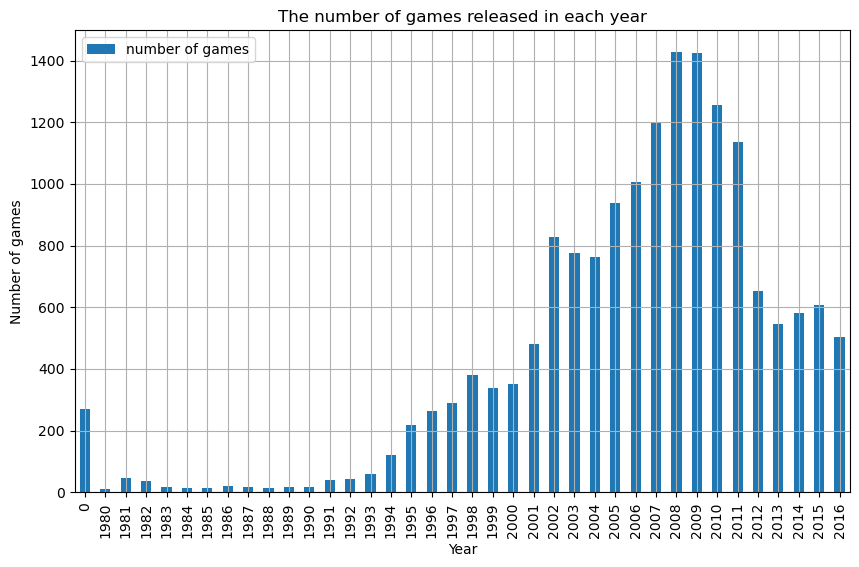

In [11]:
# Visualisation
data_year.plot(x='year', y='number of games', kind='bar', figsize=(10, 6), sharex=False, grid=True)
plt.title('The number of games released in each year')
plt.xlabel('Year')
plt.ylabel('Number of games')
plt.show() 

**Conclusion:** 
Until 1994, significantly fewer games were released. Considering the small share (634 games) in the total number of games released during the analyzed period (16,713 games), the data before 1994 are not representative and can be excluded.

In [12]:
# Excluding the data before 1994 
data = data.drop(data[data['year_of_release'] < 1994].index)

In [13]:
# Duplicate check
print('Number of explicit duplicates:', data.duplicated().sum())

Number of explicit duplicates: 0


#### 3.2. Sales analysis by platforms

#####  Platforms with the highest total sales and a chart of their sales distribution by year.

In [14]:
# List of platforms with total sales
platform_max = data.pivot_table(index='platform', values='region_sales', aggfunc='sum') 

# List of platforms ordered by decreasing total revenue
platform_max.sort_values(by='region_sales', ascending=False, inplace=True) 

# Top 10 platforms with the highest total sales
platform_max = platform_max.iloc[0:10]   

# The list of the top 10 platforms with the highest sales
name_platform = platform_max.index
print ('Top-selling platforms:', name_platform)

Top-selling platforms: Index(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS'], dtype='object', name='platform')


In [15]:
platform_max.reset_index()

,platform,region_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.76
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


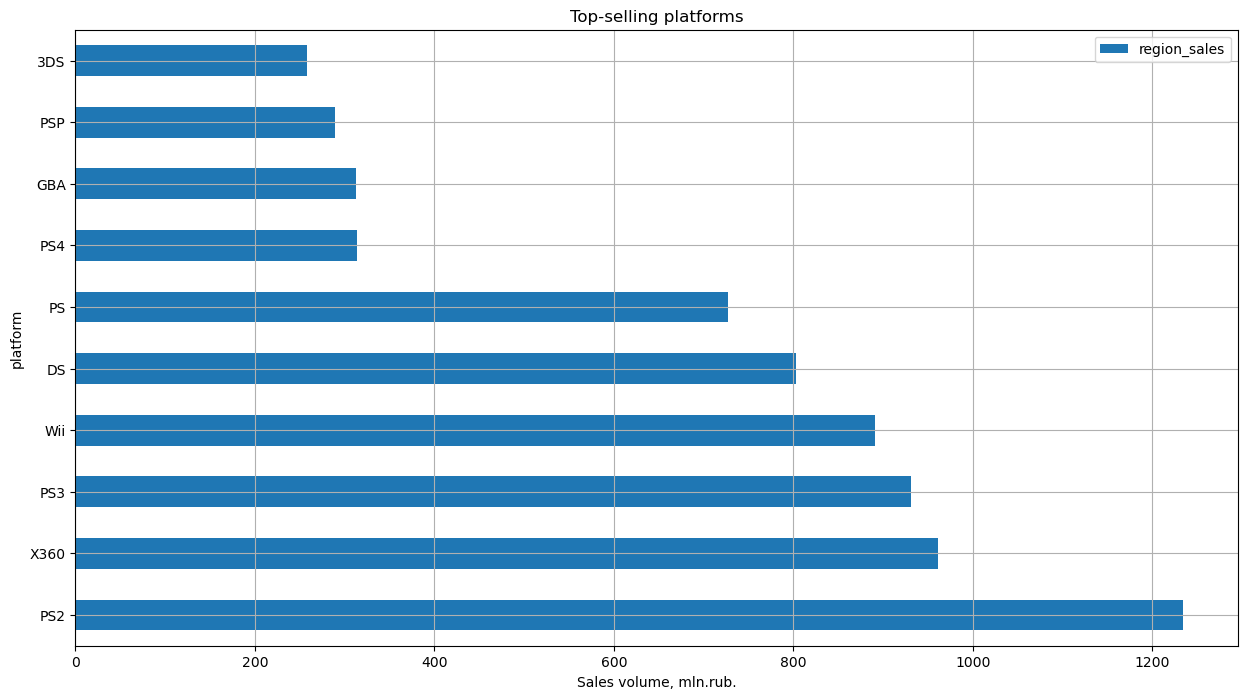

In [16]:
platform_max.plot(kind = 'barh', 
    figsize=(15,8), title = 'Top-selling platforms', grid='True')
plt.xlabel('Sales volume, mln.rub.')
plt.show()

In [17]:
# Table showing sales volumes for each year of the analyzed period for the platforms with the highest sales
platform_max_year = data.query('platform in @name_platform')
platform_max_year = platform_max_year.pivot_table(index='platform', columns='year_of_release', values='region_sales', aggfunc='sum') 
platform_max_year = pd.DataFrame(platform_max_year)
platform_max_year


year_of_release,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,,,,,,,
3DS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,63.20,51.36,56.57,43.76,27.78,15.14
DS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,146.94,145.31,119.54,85.02,26.18,11.01,1.54,NaN,NaN,NaN
GBA,NaN,NaN,NaN,NaN,NaN,NaN,0.07,61.53,74.16,56.67,...,3.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PS,6.03,35.96,94.7,136.17,169.49,144.53,96.37,35.59,6.67,2.07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PS2,NaN,NaN,NaN,NaN,NaN,NaN,39.17,166.43,205.38,184.31,...,75.99,53.90,26.40,5.64,0.45,NaN,NaN,NaN,NaN,NaN
PS3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,73.19,118.52,130.93,142.17,156.78,107.36,113.25,47.76,16.82,3.60
PS4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,25.99,100.00,118.90,69.25
PSP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,46.93,34.55,37.78,35.04,17.82,7.69,3.14,0.24,0.12,NaN
Wii,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,152.77,171.32,206.97,127.95,59.65,21.71,8.59,3.75,1.14,0.18


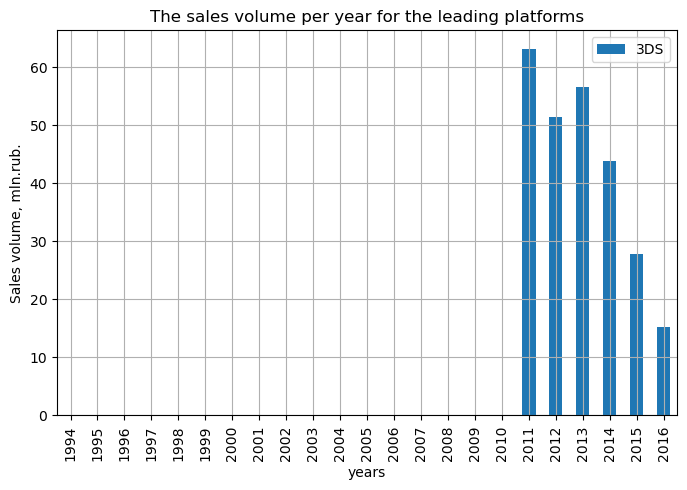

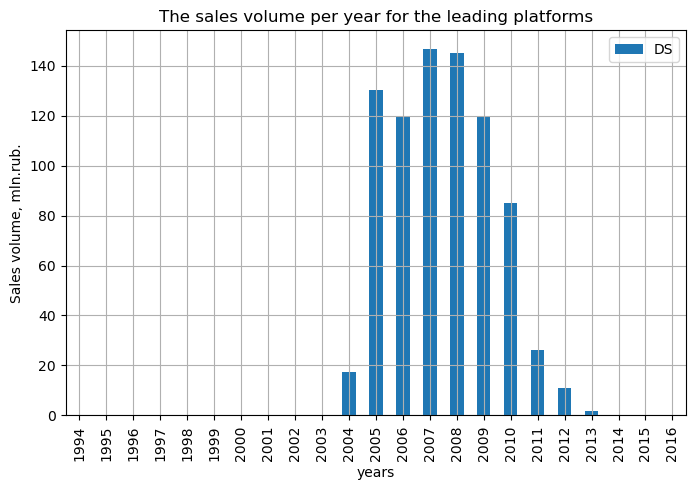

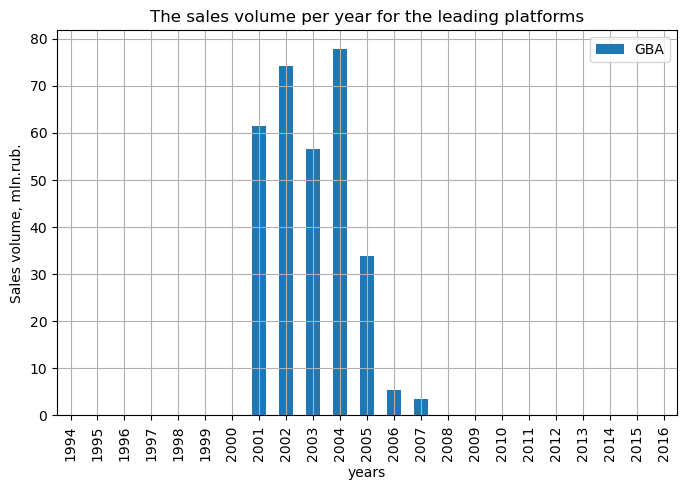

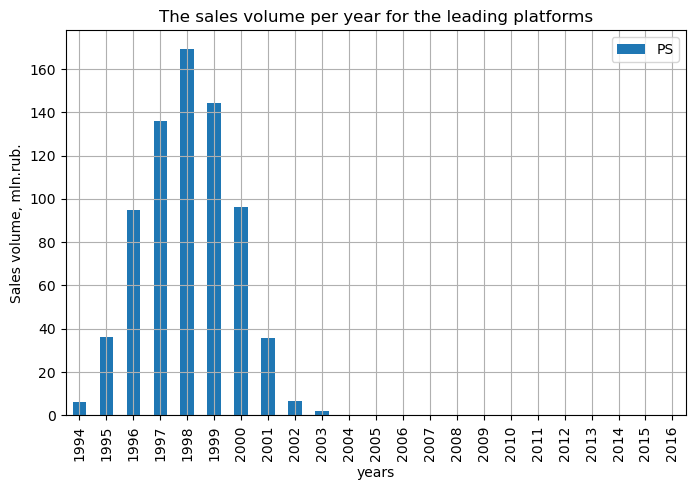

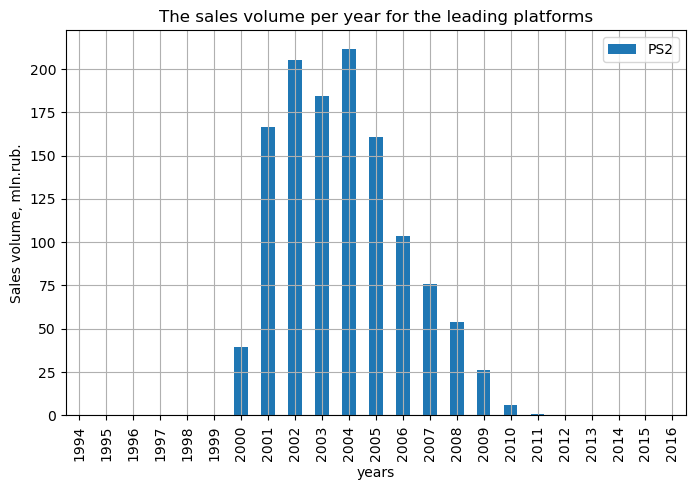

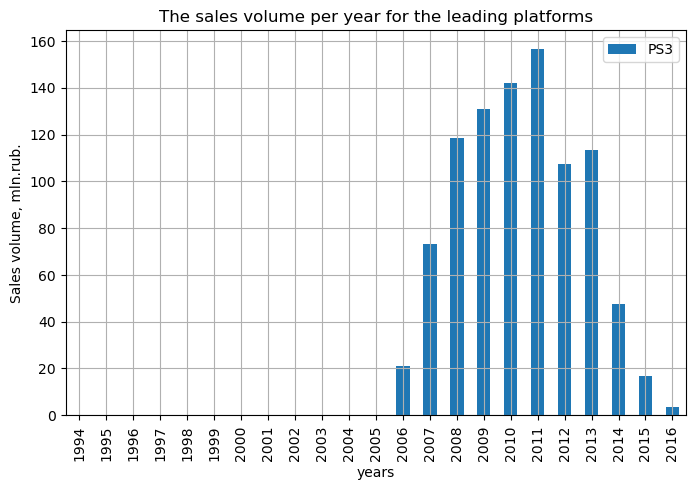

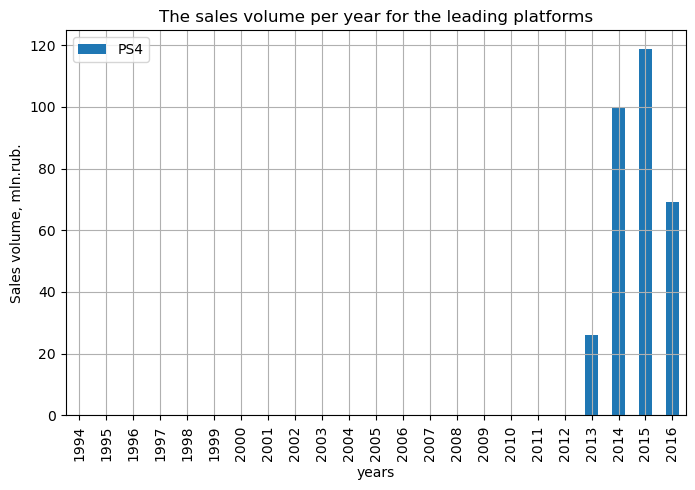

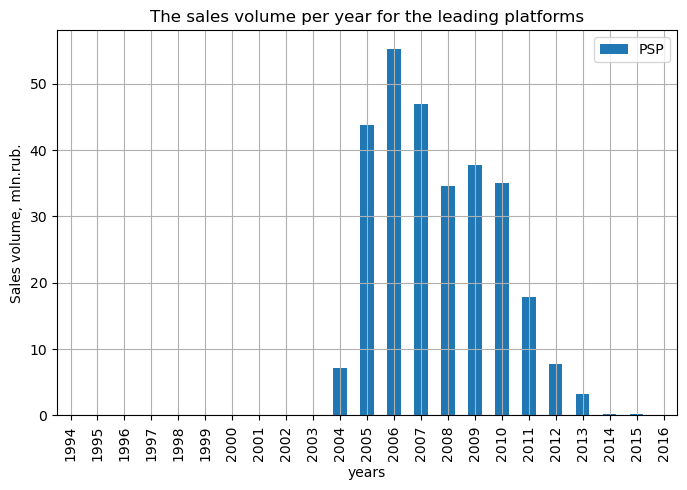

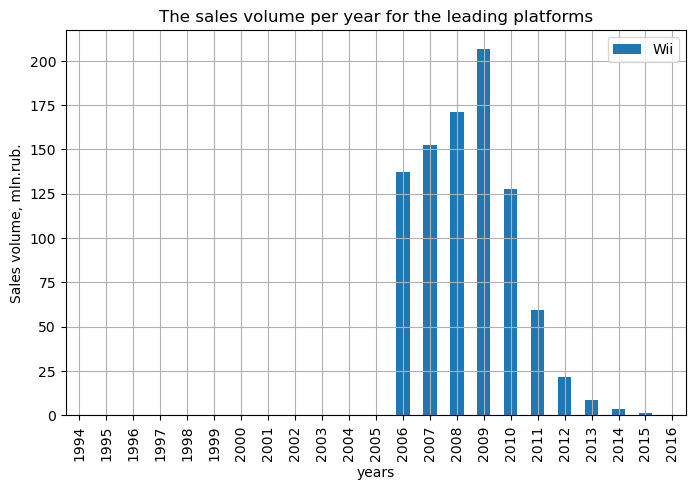

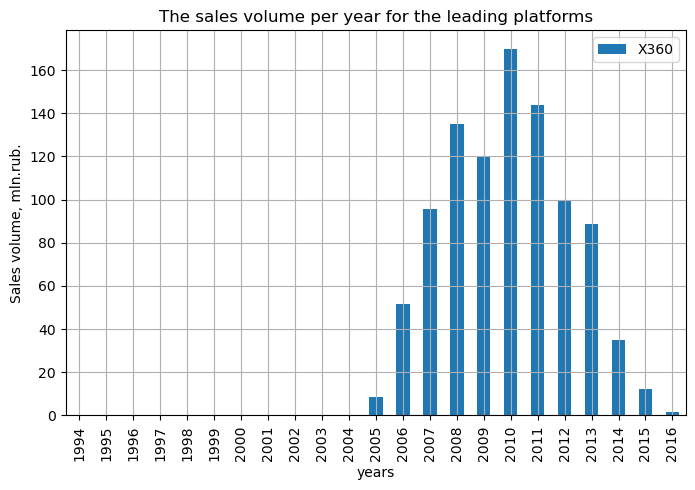

In [18]:
# Building graphs of sales changes for each platform
k = 0 # the creation of an auxiliary dataframe for chart plotting.
best_years_list =[] # the creation of # Announcement of creating an auxiliary list 
                    # to store the number of years whem a platform generated revenue

# Function for building sales change graphs for each platform.
for i in range(len(platform_max_year)): 
    k = platform_max_year.iloc[i]
    k = pd.DataFrame(k)
    best_years_list.append(k.count())
    k.plot(kind = 'bar', 
    figsize=(8,5), title = 'The sales volume per year for the leading platforms', grid='True')
    plt.xlabel('years')
    plt.ylabel('Sales volume, mln.rub.')
    plt.show()   

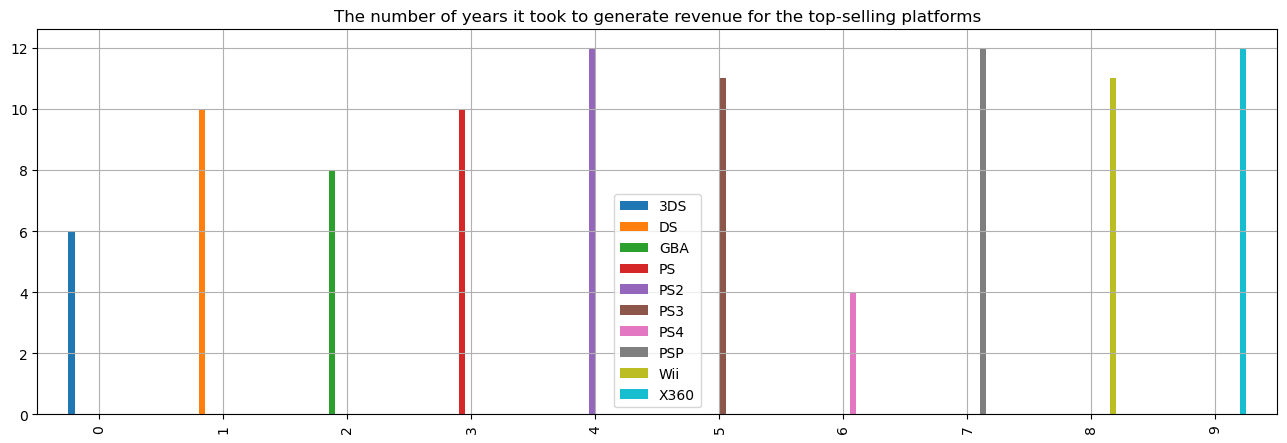

In [19]:
# Building of graph 'The number of years it took to generate revenue for the top-selling platforms'
best_years_list = pd.DataFrame(best_years_list)
best_years_list.plot(kind = 'bar', 
    figsize=(16,5), title = 'The number of years it took to generate revenue for the top-selling platforms', grid='True');


**Conclusion:** The top-selling platforms generated revenue for 4 to 12 years.

In [20]:
print('On average, each successful platform generates revenue for up to:', round(best_years_list.sum().median()), 'years')


On average, each successful platform generates revenue for up to: 10 years


##### Determination of the relevant period for forecasting sales volume for 2017

From 2012 to 2016, the number of games significantly decreased compared to the previous five years (2006-2011). Therefore, it can be concluded that the maximum analyzed period can be 5 years.

However, it is also important to consider the results of the analysis of platform success. In particular, the revenue generation period for a "successful" platform is a minimum of 4 years. Let's assume that 2017 will likely be the last year for revenue generation. In this case, the relevant period will be 3 years.

##### Selecting potentially profitable platforms for analysis

To choose potentially profitable platforms, we need to consider the following aspects:
1. The game's release date should not be later than 2014 (based on the selected relevant period).
2. Availability of data on positive ratings and customer reviews of the game (if the rating is high and the reviews are positive, sales are more likely to increase).
3. Availability of sales data for all regions and the highest sales performance for the game.

My task is to select the most promising platforms, so I will compile a list of 20 games that meet the above criteria and sort the platforms on which these games were placed.

In [21]:
# For further analysis, I'm keeping the platforms released after 2014
analysis = data.drop(data[data['year_of_release'] < 2014].index) 

# and among them, only those with high ratings and positive reviews.
analysis = analysis.drop(analysis.loc[(analysis['critic_score'] < 80) & (analysis['critic_score'] < 8)].index) 

# Creating auxiliary dataframes for analyzing global game sales
global_sales = analysis 
global_sales_1 = analysis 

In [22]:
# Creating a list of the top 20 most promising games
analysis = analysis.head(20)
analysis

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,region_sales
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83,5.7,M,7.66
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85,5.0,E,7.60
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87,6.5,M,7.17
110,Mario Kart 8,WiiU,2014,Racing,3.15,2.15,1.28,0.51,88,9.1,E,7.09
143,FIFA 15,PS4,2014,Sports,0.80,4.33,0.05,0.90,82,5.7,E,6.08
154,Destiny,PS4,2014,Shooter,2.49,2.07,0.16,0.92,76,6.1,T,5.64
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97,7.9,M,5.47
171,Uncharted 4: A Thief's End,PS4,2016,Shooter,1.85,2.50,0.19,0.85,93,7.9,T,5.39


In [23]:
# List of platforms where top-grossing games are released on
print('Promising platforms:', analysis['platform'].unique())

Promising platforms: ['PS4' 'WiiU' 'XOne']


##### Analysis of computer game sales by platform

In [24]:
# Creating a dataframe of revenue from computer game sales by platform.
global_sales = global_sales.pivot_table(index='platform', columns='name', values='region_sales', aggfunc='sum')
global_sales = pd.DataFrame(global_sales)
global_sales.reset_index()
global_sales

name,2014 FIFA World Cup Brazil,7 Days to Die,7th Dragon III Code: VFD,A-Train: City Simulator,Act of Aggression,Adventure Time: The Secret of the Nameless Kingdom,Aegis of Earth: Protonovus Assault,Agatha Christie's The ABC Murders,Agatha Christie: The ABC Murders,Alien: Isolation,...,XCOM 2,Xblaze: Lost Memories,Xenoblade Chronicles X,Yaiba: Ninja Gaiden Z,Yoshi's New Island,Yoshi's Woolly World,Zero Escape: Zero Time Dilemma,Zombie Army Trilogy,htoL#NiQ: The Firefly Diary,inFAMOUS: Second Son
platform,,,,,,,,,,,,,,,,,,,,,
3DS,NaN,NaN,0.16,0.06,NaN,0.07,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.38,NaN,0.08,NaN,NaN,NaN
PC,NaN,NaN,NaN,NaN,0.01,NaN,NaN,NaN,0.02,0.15,...,0.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PS3,0.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.02,NaN,0.10,NaN,NaN,NaN,NaN,NaN,NaN
PS4,NaN,0.14,NaN,NaN,NaN,NaN,0.02,0.02,NaN,1.12,...,0.14,NaN,NaN,NaN,NaN,NaN,NaN,0.20,NaN,2.79
PSV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.06,NaN,0.01,NaN
WiiU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.84,NaN,NaN,1.3,NaN,NaN,NaN,NaN
X360,0.43,NaN,NaN,NaN,NaN,0.05,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.04,NaN,NaN,NaN,NaN,NaN,NaN
XOne,NaN,0.05,NaN,NaN,NaN,NaN,NaN,0.01,NaN,0.50,...,0.04,NaN,NaN,NaN,NaN,NaN,NaN,0.11,NaN,NaN


In [25]:
global_sales.describe() 

name,2014 FIFA World Cup Brazil,7 Days to Die,7th Dragon III Code: VFD,A-Train: City Simulator,Act of Aggression,Adventure Time: The Secret of the Nameless Kingdom,Aegis of Earth: Protonovus Assault,Agatha Christie's The ABC Murders,Agatha Christie: The ABC Murders,Alien: Isolation,...,XCOM 2,Xblaze: Lost Memories,Xenoblade Chronicles X,Yaiba: Ninja Gaiden Z,Yoshi's New Island,Yoshi's Woolly World,Zero Escape: Zero Time Dilemma,Zombie Army Trilogy,htoL#NiQ: The Firefly Diary,inFAMOUS: Second Son
count,2.000000,2.00000,1.00,1.00,1.00,2.000000,1.00,2.000000,1.00,3.000000,...,3.000000,1.00,1.00,2.000000,1.00,1.0,2.000000,2.00000,1.00,1.00
mean,0.520000,0.09500,0.16,0.06,0.01,0.060000,0.02,0.015000,0.02,0.590000,...,0.136667,0.02,0.84,0.070000,1.38,1.3,0.070000,0.15500,0.01,2.79
std,0.127279,0.06364,NaN,NaN,NaN,0.014142,NaN,0.007071,NaN,0.491223,...,0.095044,NaN,NaN,0.042426,NaN,NaN,0.014142,0.06364,NaN,NaN
min,0.430000,0.05000,0.16,0.06,0.01,0.050000,0.02,0.010000,0.02,0.150000,...,0.040000,0.02,0.84,0.040000,1.38,1.3,0.060000,0.11000,0.01,2.79
25%,0.475000,0.07250,0.16,0.06,0.01,0.055000,0.02,0.012500,0.02,0.325000,...,0.090000,0.02,0.84,0.055000,1.38,1.3,0.065000,0.13250,0.01,2.79
50%,0.520000,0.09500,0.16,0.06,0.01,0.060000,0.02,0.015000,0.02,0.500000,...,0.140000,0.02,0.84,0.070000,1.38,1.3,0.070000,0.15500,0.01,2.79
75%,0.565000,0.11750,0.16,0.06,0.01,0.065000,0.02,0.017500,0.02,0.810000,...,0.185000,0.02,0.84,0.085000,1.38,1.3,0.075000,0.17750,0.01,2.79
max,0.610000,0.14000,0.16,0.06,0.01,0.070000,0.02,0.020000,0.02,1.120000,...,0.230000,0.02,0.84,0.100000,1.38,1.3,0.080000,0.20000,0.01,2.79


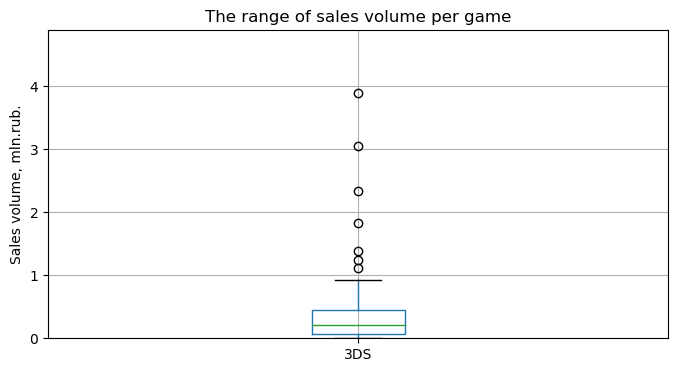

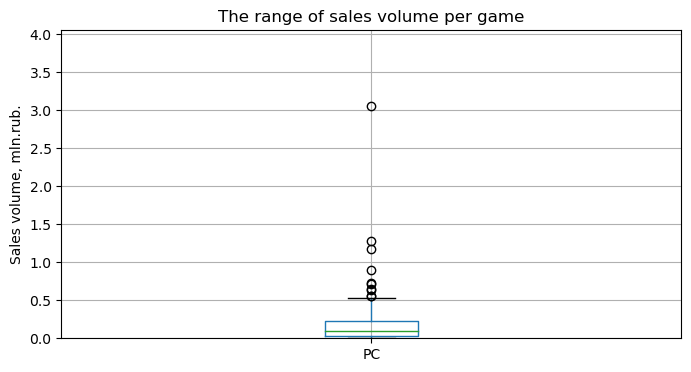

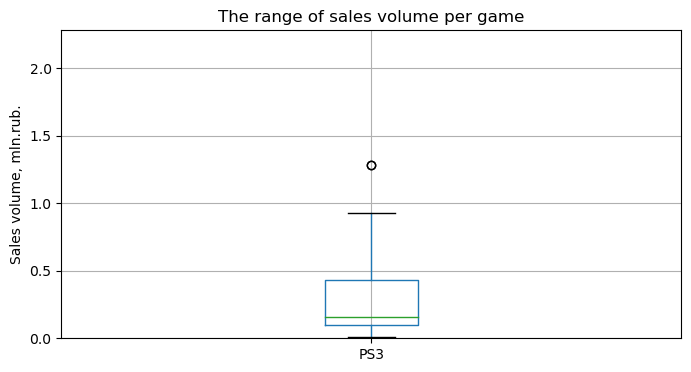

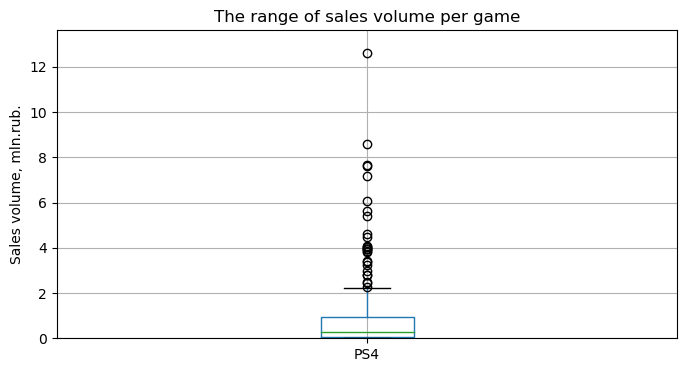

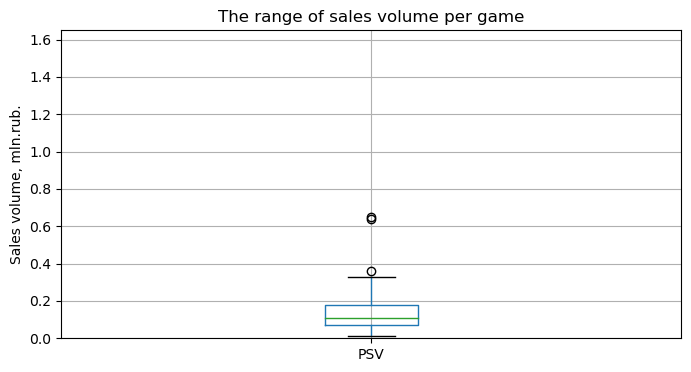

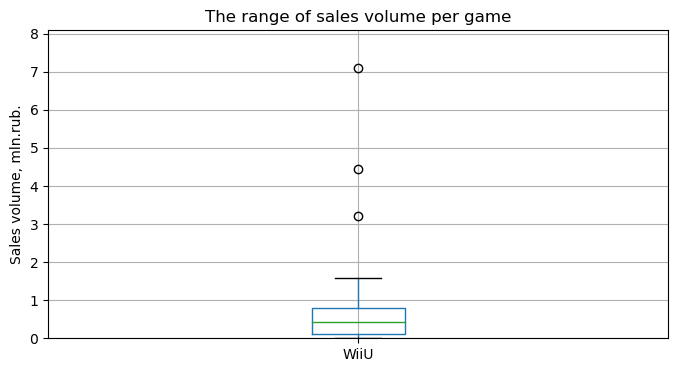

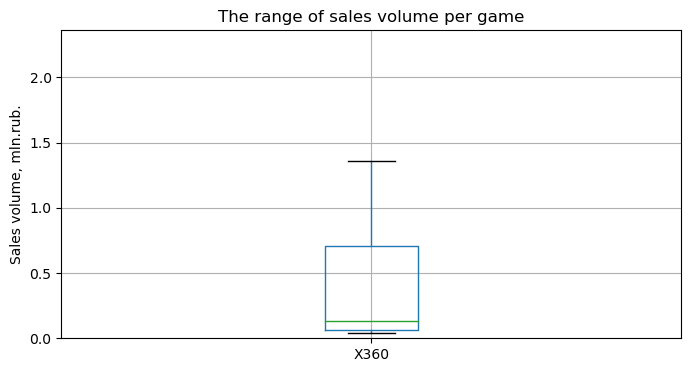

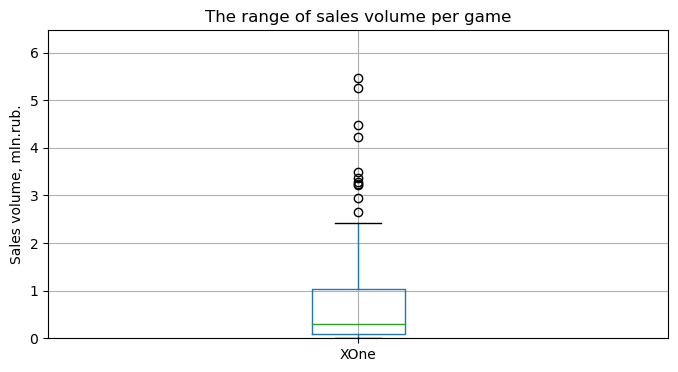

In [26]:
# Boxplot of global game sales by platforms
m = 0
maximum = 0
for i in range(len(global_sales)): 
    m = global_sales.iloc[i] # Sales volume for each game broken down by each platform
    m = pd.DataFrame(m)
    maximum = global_sales.iloc[i].max() # for the optimal selection of the sales volume range individually for each platform
    m.boxplot(figsize=(8, 4)) # graph boxplot 
    plt.title('The range of sales volume per game')
    plt.ylim(0, maximum+1)
    plt.ylabel('Sales volume, mln.rub.')
    plt.show()
    
    

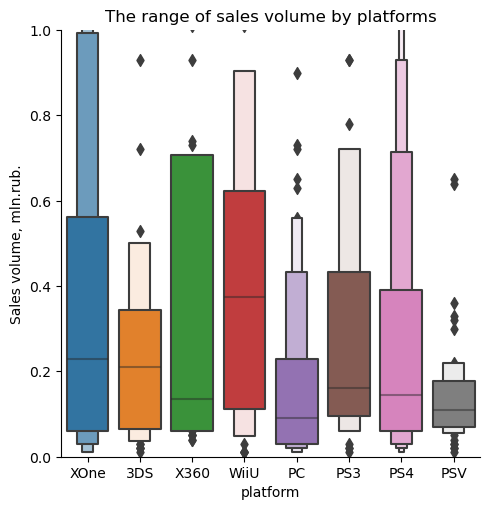

In [27]:
# Detection and removal of outliers
q1 = global_sales_1.region_sales.quantile(0.25)
q3 = global_sales_1.region_sales.quantile(0.75)
iqr = q3 - q1
global_sales_1 = global_sales_1.query('region_sales <= @q3 + 1.5 * @iqr')

# Bulding general graph for all platforms
sns.catplot(data=global_sales_1, x='platform', y='region_sales', kind='boxen')
plt.title('The range of sales volume by platforms')
plt.ylim(0, 1)
plt.ylabel('Sales volume, mln.rub.')
plt.show()

**Conclusion:**

Boxplots have been constructed for each platform, showing how the sales volumes are distributed for each game placed on that platform.

**Platform 3DS:** It is not a sales favorite. The median sales volume is below 0.2 million dollars. However, there were 7 games on the platform that generated sales volumes ranging from 1 to nearly 4 million dollars, which secured the platform a place in the ranking.

**Platform PC:** It is also not a sales favorite. Despite 6 games on this platform generating sales volumes ranging from 0.5 to 1.4 million dollars, and one game generating over 3 million dollars, the median sales volume is even lower than that of the 3DS platform. This suggests that, in most cases, many games are placed on the platform, but they have low sales volume.

**Platform PS3:** The sales volume situation is similar to the previous platforms. It is worth noting a sales volume "outlier" of about 1.25 million dollars, but this was a single case that secured its place in the ranking.

**Platform PS4:** Although the low median sales volume is noticeable, the significant presence of highly profitable games allowed this platform to take the lead. It was a game placed on this platform that generated the maximum revenue over the entire analyzed period - 12.62 million dollars. The total number of games on this platform is 237.

**Platform PSV:** It cannot be called a favorite, with a median sales volume of around 0.1 million dollars, and only three "outliers" allowed the platform to make it into the ranking.

**Platform Wii U:** Another successful platform. Its sales volume lags behind the ranking leader - the PS4 platform. The total number of games on this platform is 43, with three games contributing significant sales revenue for the entire platform over the analyzed period.

**Platform Xbox 360:** There were no "outliers" for this platform, with 75% of all games contributing 75% of the total revenue. However, the absence of popular games negatively impacted the platform's ranking.

**Platform Xbox One:** Another successful platform. The graph reflects the overall trend of successful platforms: low median sales volume with the presence of highly profitable games. The maximum revenue from one of the games was 5.47 million dollars. Nine games placed on this platform secured its place in the platform ranking. The total number of games is 155.

##### Characteristics of platforms where top-grossing games are released on

In [28]:
# Platform PS4
print('Maximum sales volume:', round(global_sales.iloc[3].max(),2)) 
print('Number of posted games:', global_sales.iloc[3].count()) 

Maximum sales volume: 12.62
Number of posted games: 237


In [29]:
# Platform WiiU
print('Maximum sales volume:', global_sales.iloc[5].max()) 
print('Number of posted games:', global_sales.iloc[5].count()) 

Maximum sales volume: 7.09
Number of posted games: 43


In [30]:
# Platform XOne
print('Maximum sales volume:', global_sales.iloc[7].max()) 
print('Number of posted games:', global_sales.iloc[7].count()) 

Maximum sales volume: 5.47
Number of posted games: 155


##### Analysis of  user and critic reviews on sales within one popular platform:  PS4 case study

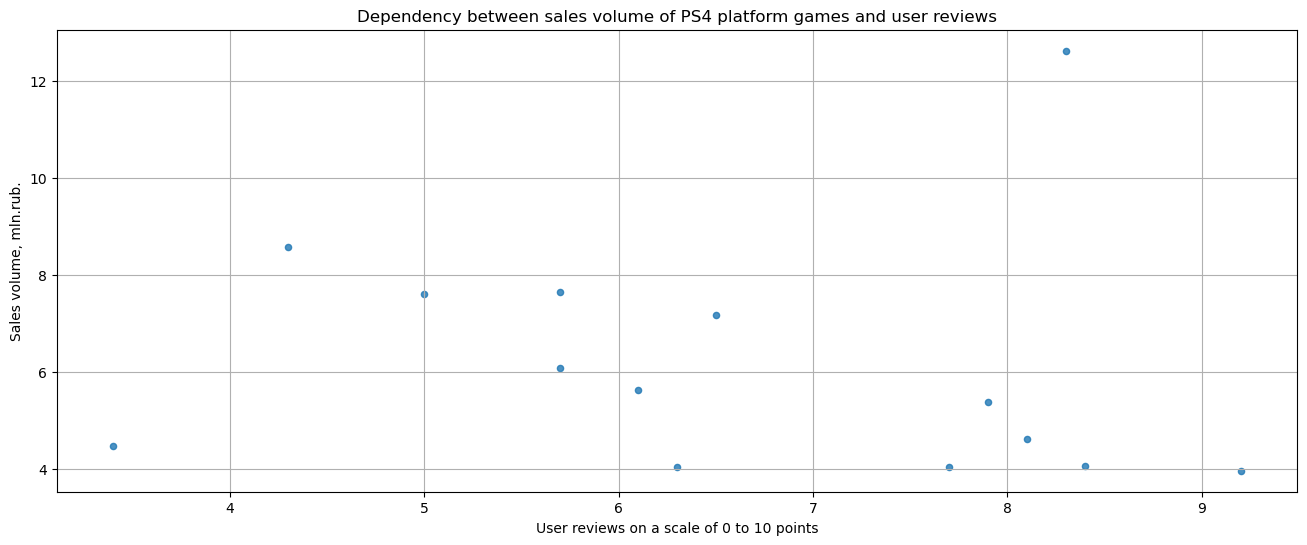

In [31]:
# Graph of sales volume dependency on user reviews for each game
global_sales_ps4 = analysis.loc[analysis['platform']=='PS4'] 
global_sales_ps4.plot(x='user_score', y='region_sales', kind='scatter', alpha=0.8, 
                      title = 'Dependency between sales volume of PS4 platform games and user reviews', 
                      figsize=(16,6), grid=True)
plt.xlabel('User reviews on a scale of 0 to 10 points')
plt.ylabel('Sales volume, mln.rub.')
plt.show()


In [32]:
print('Pearson Correlation Coefficient:', global_sales_ps4['user_score'].corr(global_sales_ps4['region_sales']))

Pearson Correlation Coefficient: -0.13025563441695723


The Pearson correlation coefficient is negative, thus, it can be concluded that user reviews have a negative impact on the game's sales volume. However, this influence is weak. Most likely, there were many negative reviews.

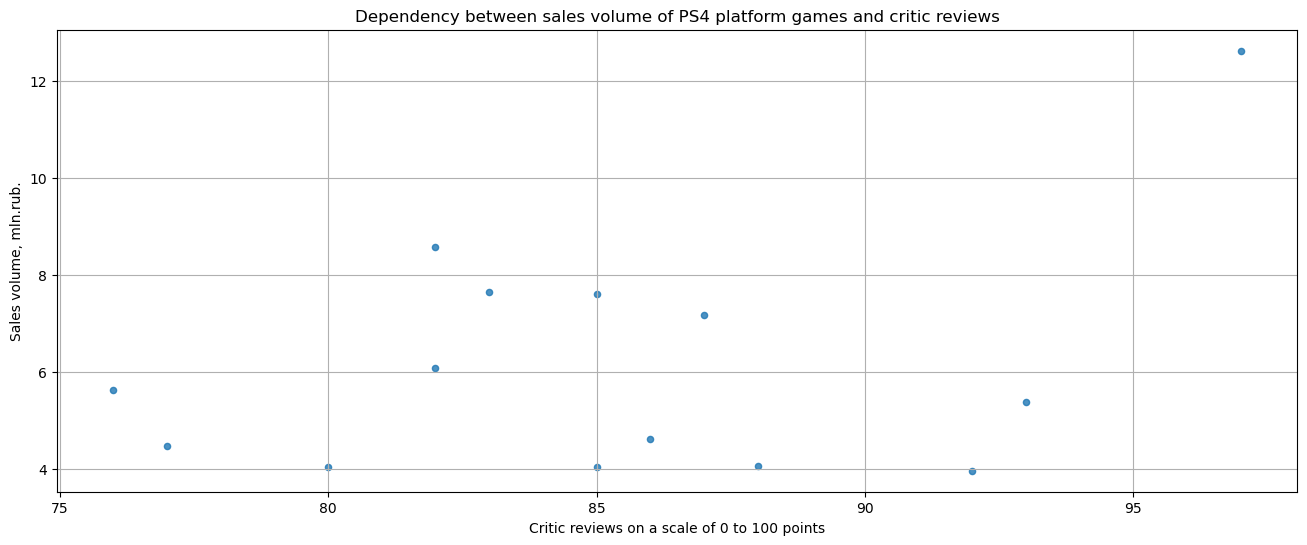

In [33]:
# Graph of sales volume dependency on critic reviews for each game
global_sales_ps4 = analysis.loc[analysis['platform']=='PS4'] 
global_sales_ps4.plot(x='critic_score', y='region_sales', kind='scatter', alpha=0.8, 
                      title = 'Dependency between sales volume of PS4 platform games and critic reviews', 
                      figsize=(16,6), grid=True)
plt.xlabel('Critic reviews on a scale of 0 to 100 points')
plt.ylabel('Sales volume, mln.rub.')
plt.show()

In [34]:
print('Pearson Correlation Coefficient:', global_sales_ps4['critic_score'].corr(global_sales_ps4['region_sales']))

Pearson Correlation Coefficient: 0.36553216433725266


The Pearson correlation coefficient is positive, thus, it can be concluded that critic reviews have a positive impact on the sales volume of a game, and this influence is more significant than that of user reviews.

##### Analysis of  user and critic reviews on sales within one popular platform:  WiiU case study

In [35]:
global_sales_wiiu = analysis.loc[analysis['platform']=='WiiU'] 
print('Pearson Correlation Coefficient: ', global_sales_wiiu['user_score'].corr(global_sales_wiiu['region_sales']))
print('Pearson Correlation Coefficient:', global_sales_wiiu['critic_score'].corr(global_sales_wiiu['region_sales']))

Pearson Correlation Coefficient:  1.0
Pearson Correlation Coefficient: 1.0


The Pearson coefficient value for the WiiU platform indicates a direct correlation between sales and user and critic reviews.

##### Analysis of  user and critic reviews on sales within one popular platform:  XOne case study

In [36]:
global_sales_xone = analysis.loc[analysis['platform']=='XOne'] 
print('Pearson Correlation Coefficient:', global_sales_xone['user_score'].corr(global_sales_xone['region_sales']))
print('Pearson Correlation Coefficient:', global_sales_xone['critic_score'].corr(global_sales_xone['region_sales']))

Pearson Correlation Coefficient: 0.3425097721153832
Pearson Correlation Coefficient: 0.3334431851998521


User and critic reviews for the XOne platform have an equally positive impact on sales volume, as confirmed by the Pearson correlation coefficients.

##### Analysis of user and critic reviews on sales within one popular platform:  PS4 case study

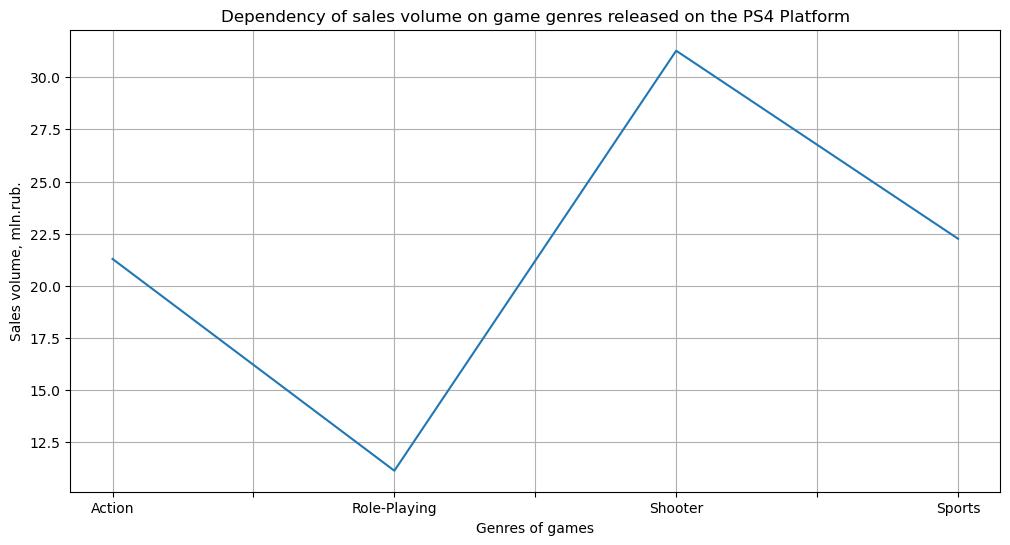

In [37]:
global_sales_ps4.groupby('genre')['region_sales'].sum().plot(title = 
                                                             'Dependency of sales volume on game genres released on the PS4 Platform',
                                                              grid=True, figsize=(12, 6))
plt.xlabel('Genres of games')
plt.ylabel('Sales volume, mln.rub.')
plt.show()

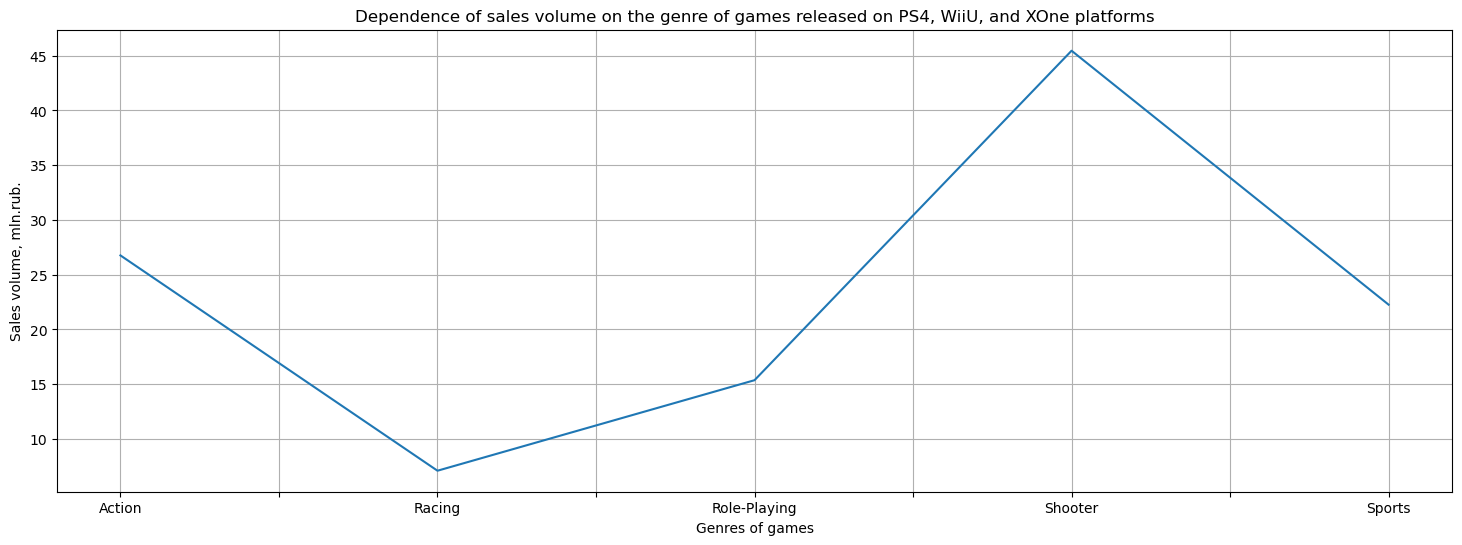

In [38]:
global_sales_3_leaders = analysis.query('(platform == "PS4") or (platform == "WiiU") or (platform == "XOne")')
global_sales_3_leaders.groupby('genre')['region_sales'].sum().plot(kind='line', 
                        title = 'Dependence of sales volume on the genre of games released on PS4, WiiU, and XOne platforms',
                        grid=True, figsize=(18, 6))
plt.xlabel('Genres of games')
plt.ylabel('Sales volume, mln.rub.')
plt.show()

**Conclusion.** The overall distribution of games by genres on PS4, WiiU, and XOne platforms revealed the following best-selling genres: Action, Shooter, Sports. The underperforming genres are Role-Playing and Racing.

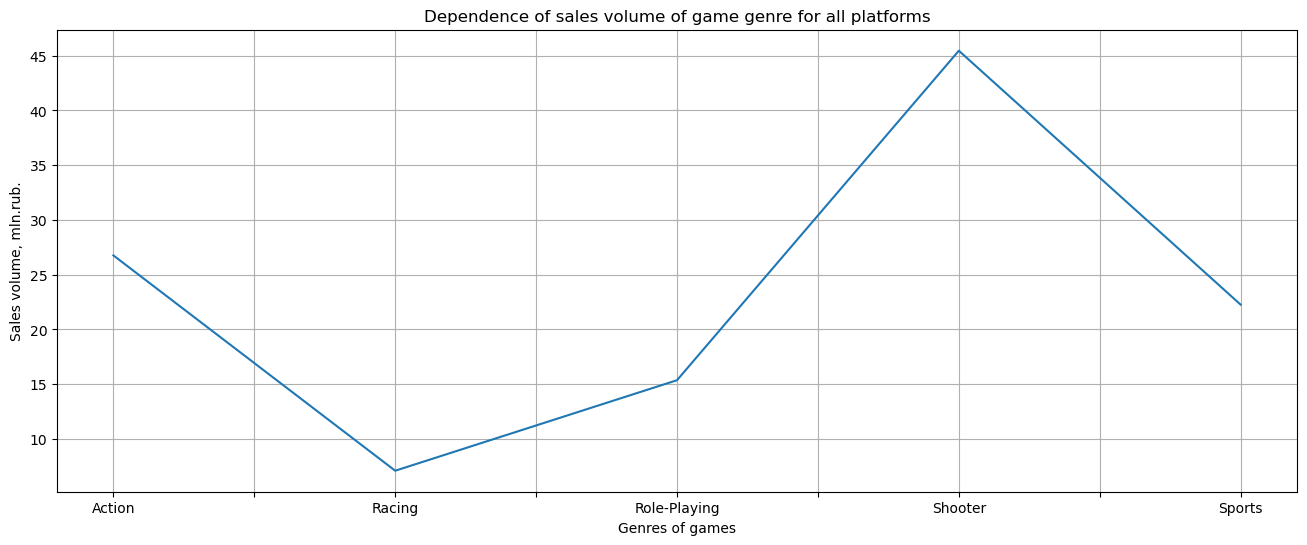

In [39]:
analysis.groupby('genre')['region_sales'].sum().plot(kind='line', 
                        title = 'Dependence of sales volume of game genre for all platforms',
                        grid=True, figsize=(16, 6))
plt.xlabel('Genres of games')
plt.ylabel('Sales volume, mln.rub.')
plt.show()

**Conclusion.** The overall distribution of games by genres on all platforms confirms that the sales leaders in the following genres are: Action, Shooter, Sports. Role-Playing and Racing are the outsiders.

### 4. User profile for each region (NA, EU, JP)

##### 4.1. Top 5 most popular platforms. Differences in sales shares

**Gaming Platforms of North America**

In [40]:
# list of platforms with total sales
platform_max_na = analysis.pivot_table(index='platform', values='na_sales', aggfunc='sum')

# list of platforms ordered by decreasing total revenue
platform_max_na.sort_values(by='na_sales', ascending=False, inplace=True) 

# platforms with the highest total sales
platform_max_na = platform_max_na.iloc[0:5]   

# adding a column with region sales share
platform_max_na['na_weight'] = round(platform_max_na['na_sales']*100/platform_max_na['na_sales'].sum(), 2)

platform_max_na

,na_sales,na_weight
platform,,
PS4,24.55,60.53
XOne,11.32,27.91
WiiU,4.69,11.56


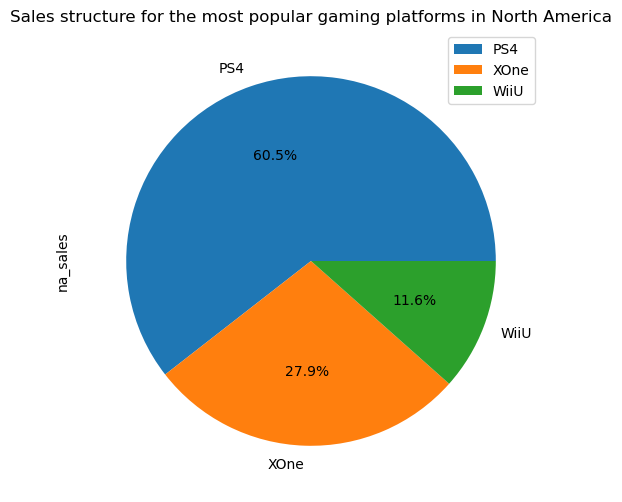

In [41]:
platform_max_na.plot(y='na_sales', kind = 'pie', autopct='%1.1f%%',
                     title = 'Sales structure for the most popular gaming platforms in North America',figsize=(6,6));


The chart shows that the leader in sales in North America is the PS4 gaming platform with a sales share of 60.5%.

**Gaming Platforms of Europe**

In [42]:
# list of platforms with total sales
platform_max_eu = analysis.pivot_table(index='platform', values='eu_sales', aggfunc='sum')

# list of platforms ordered by decreasing total revenue
platform_max_eu.sort_values(by='eu_sales', ascending=False, inplace=True) 

# platforms with the highest total sales
platform_max_eu = platform_max_eu.iloc[0:5]   

# adding a column with region sales share
platform_max_eu['eu_weight'] = round(platform_max_eu['eu_sales']*100/platform_max_eu['eu_sales'].sum(), 2)

platform_max_eu

,eu_sales,eu_weight
platform,,
PS4,45.90,82.61
XOne,6.33,11.39
WiiU,3.33,5.99


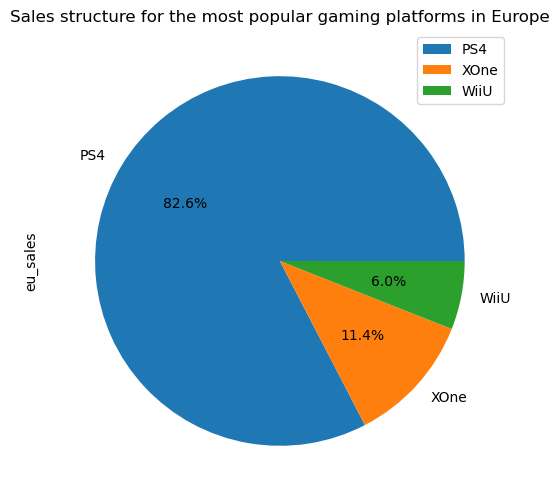

In [43]:
platform_max_eu.plot(y='eu_sales', kind = 'pie', autopct='%1.1f%%',
                     title = 'Sales structure for the most popular gaming platforms in Europe',figsize=(6,6));

The chart shows that the top-selling platform in Europe is also the PS4, with a sales share of 82.6%.

**Gaming Platforms of Japan**

In [44]:
# list of platforms with total sales
platform_max_jp = analysis.pivot_table(index='platform', values='jp_sales', aggfunc='sum')

# list of platforms ordered by decreasing total revenue
platform_max_jp.sort_values(by='jp_sales', ascending=False, inplace=True) 

# platforms with the highest total sales
platform_max_jp = platform_max_jp.iloc[0:5]   

# adding a column with region sales share
platform_max_jp['jp_weight'] = round(platform_max_jp['jp_sales']*100/platform_max_jp['jp_sales'].sum(), 2)

platform_max_jp

,jp_sales,jp_weight
platform,,
WiiU,2.74,55.13
PS4,2.18,43.86
XOne,0.05,1.01


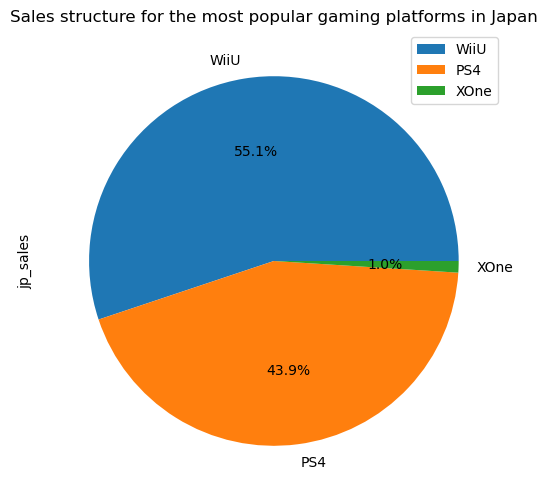

In [45]:
platform_max_jp.plot(y='jp_sales', kind = 'pie', autopct='%1.1f%%',
                     title = 'Sales structure for the most popular gaming platforms in Japan',figsize=(6,6));


The chart shows that the sales leader in Japan is the WiiU gaming platform with a sales share of 55.1%, while the PS4 is in second place with a sales share of 43.9%.

In [46]:
# Combine all data into one table and create a chart

platform_max_all = platform_max_na.join(platform_max_eu, how='outer') 
platform_max_all = pd.DataFrame(platform_max_all.join(platform_max_jp, how='outer'))
platform_max_all.drop(["na_sales", "eu_sales", "jp_sales"], axis=1, inplace=True)
platform_max_all = platform_max_all.fillna(value='0')
platform_max_all

,na_weight,eu_weight,jp_weight
platform,,,
PS4,60.53,82.61,43.86
WiiU,11.56,5.99,55.13
XOne,27.91,11.39,1.01


In [47]:
# Combine all data into one table and create a chart
platform_max_all = platform_max_all.rename_axis(None, axis=1).reset_index() 
platform_max_all.na_weight = platform_max_all.na_weight.astype(float) 
platform_max_all.eu_weight = platform_max_all.eu_weight.astype(float) 
platform_max_all.jp_weight = platform_max_all.jp_weight.astype(float) 

platform_max_all

,platform,na_weight,eu_weight,jp_weight
0,PS4,60.53,82.61,43.86
1,WiiU,11.56,5.99,55.13
2,XOne,27.91,11.39,1.01


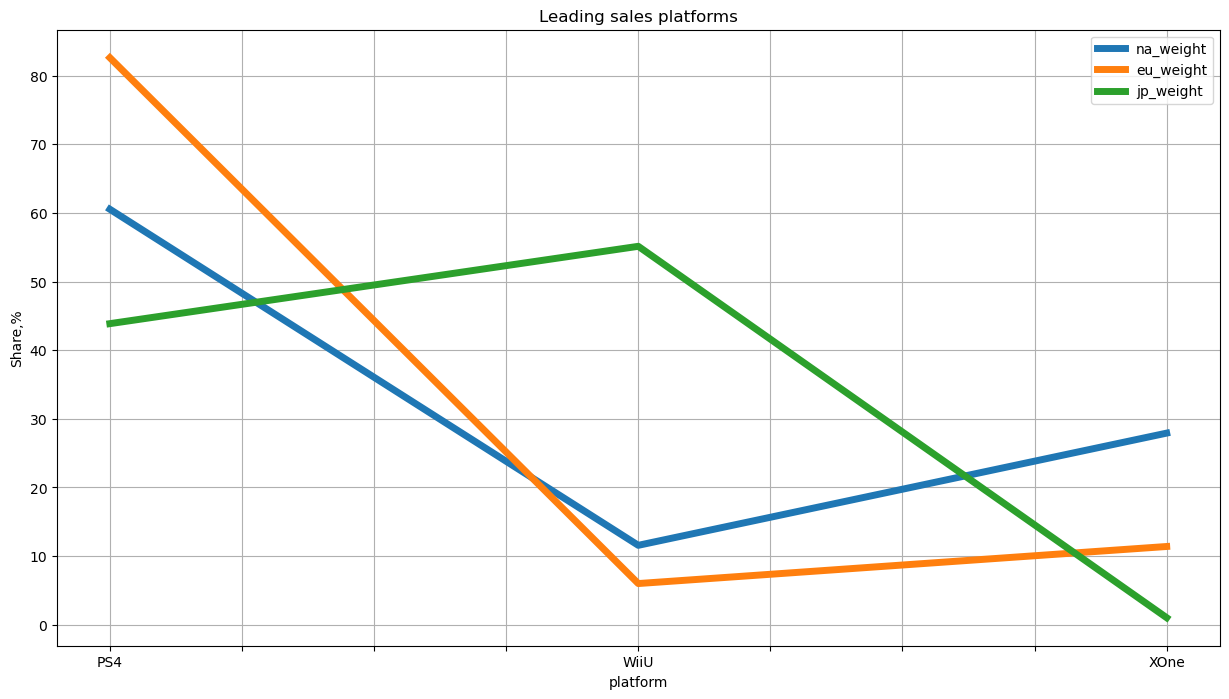

In [48]:
platform_max_all.plot(y=['na_weight', 'eu_weight', 'jp_weight'], x='platform', kind = 'line', 
    figsize=(15,8), title = 'Leading sales platforms', grid='True', linewidth= 5, use_index=True)
plt.ylabel('Share,%')
plt.show()

The graph demonstrates that the share of sales volume for each platform in the total sales volume significantly differs depending on the region. For example, the PS4 platform is the sales leader in North America, while the WiiU platform leads in Japan.

##### 4.2. The most popular genres (top 5). Differences in sales shares

**Gaming Platforms of North America**

In [49]:
# List of genres with total sales
genre_max_na = analysis.pivot_table(index='genre', values='na_sales', aggfunc='sum')

# list of genres ordered by decreasing total revenue
genre_max_na.sort_values(by='na_sales', ascending=False, inplace=True) 

# genres with the highest total sales
genre_max_na = genre_max_na.iloc[0:5]   

# adding a column with region sales share
genre_max_na['na_weight'] = round(genre_max_na['na_sales']*100/genre_max_na['na_sales'].sum(), 2)

genre_max_na

,na_sales,na_weight
genre,,
Shooter,18.53,45.69
Action,10.24,25.25
Role-Playing,6.06,14.94
Racing,3.15,7.77
Sports,2.58,6.36


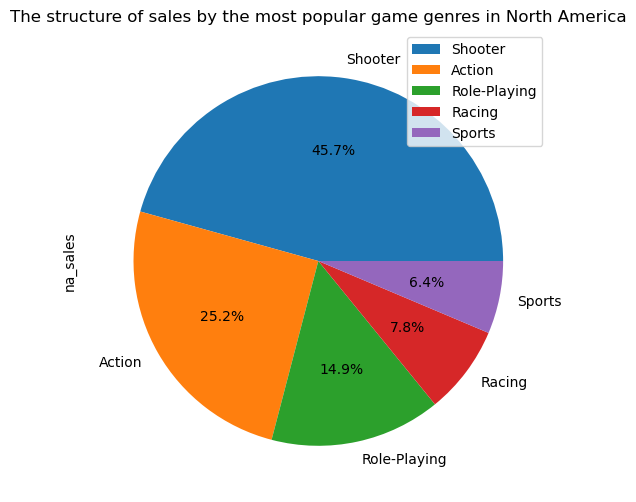

In [50]:
genre_max_na.plot(y='na_sales', kind = 'pie', autopct='%1.1f%%',
                     title = 'The structure of sales by the most popular game genres in North America',figsize=(6,6));

The chart demonstrates that the sales leaders in North America are games of the shooter and action genres with respective shares of 45.7% and 25.2% of total sales.

**Gaming Platforms of Europe**

In [51]:
# List of genres with total sales
genre_max_eu = analysis.pivot_table(index='genre', values='eu_sales', aggfunc='sum')

# list of genres ordered by decreasing total revenue
genre_max_eu.sort_values(by='eu_sales', ascending=False, inplace=True) 

# genres with the highest total sales
genre_max_eu = genre_max_eu.iloc[0:5]   

# adding a column with region sales share
genre_max_eu['eu_weight'] = round(genre_max_eu['eu_sales']*100/genre_max_eu['eu_sales'].sum(), 2)

genre_max_eu

,eu_sales,eu_weight
genre,,
Shooter,18.38,33.08
Sports,16.20,29.16
Action,12.11,21.80
Role-Playing,6.72,12.10
Racing,2.15,3.87


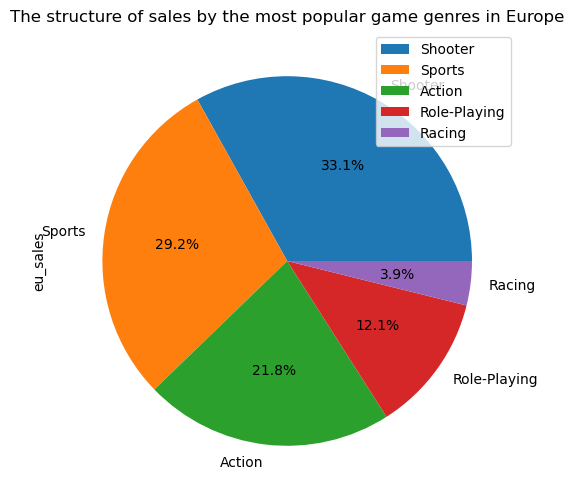

In [52]:
genre_max_eu.plot(y='eu_sales', kind = 'pie', autopct='%1.1f%%',
                     title = 'The structure of sales by the most popular game genres in Europe',figsize=(6,6));


The graph shows that the top-selling genres in Europe are Shooter and Sports games, accounting for 33.1% and 29.2% of sales, respectively.

**Gaming Platforms of Japan**

In [53]:
# List of genres with total sales
genre_max_jp = analysis.pivot_table(index='genre', values='jp_sales', aggfunc='sum')

# list of genres ordered by decreasing total revenue
genre_max_jp.sort_values(by='jp_sales', ascending=False, inplace=True) 

# genres with the highest total sales
genre_max_jp = genre_max_jp.iloc[0:5]   

# adding a column with region sales share
genre_max_jp['jp_weight'] = round(genre_max_jp['jp_sales']*100/genre_max_jp['jp_sales'].sum(), 2)

genre_max_jp

,jp_sales,jp_weight
genre,,
Shooter,2.45,49.30
Racing,1.28,25.75
Action,0.57,11.47
Role-Playing,0.48,9.66
Sports,0.19,3.82


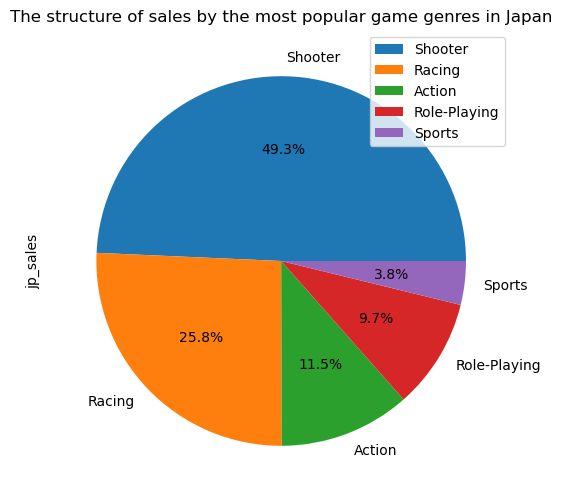

In [54]:
genre_max_jp.plot(y='jp_sales', kind = 'pie', autopct='%1.1f%%',
                     title = 'The structure of sales by the most popular game genres in Japan',figsize=(6,6));


The graph demonstrates that shooters are the undisputed sales leader in Japan, accounting for 49.3% of total sales, while racing games are in second place with 25.8% of the market share.

##### 4.3. The impact of ESRB rating on sales in each region

**Gaming Platforms of North America**

In [55]:
# rating ESRB with total sales
rating_max_na = analysis.pivot_table(index='rating', values='na_sales', aggfunc='sum')

# rating ESRB, ordered by decreasing total revenue
rating_max_na.sort_values(by='na_sales', ascending=False, inplace=True) 

# adding a column with sales share by region
rating_max_na['na_weight'] = round(rating_max_na['na_sales']*100/rating_max_na['na_sales'].sum(), 2)

rating_max_na

,na_sales,na_weight
rating,,
M,24.10,59.42
T,9.19,22.66
E,5.73,14.13
E10+,1.54,3.80


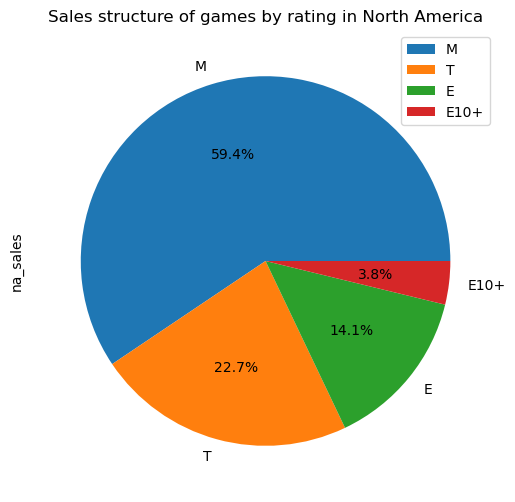

In [56]:
rating_max_na.plot(y='na_sales', kind = 'pie', autopct='%1.1f%%',
                     title = 'Sales structure of games by rating in North America',figsize=(6,6));

The largest share (59.4%) of sales volume in North America is provided by games with an "M" rating ("Mature") - "17 and older": Game content is not suitable for those under 17 years old.

**Gaming Platforms of Europe**

In [57]:
# rating ESRB with total sales
rating_max_eu = analysis.pivot_table(index='rating', values='eu_sales', aggfunc='sum')

# rating ESRB, ordered by decreasing total revenue
rating_max_eu.sort_values(by='eu_sales', ascending=False, inplace=True) 

# adding a column with sales share by region
rating_max_eu['eu_weight'] = round(rating_max_eu['eu_sales']*100/rating_max_eu['eu_sales'].sum(), 2)

rating_max_eu

,eu_sales,eu_weight
rating,,
M,28.48,51.26
E,18.35,33.03
T,7.55,13.59
E10+,1.18,2.12


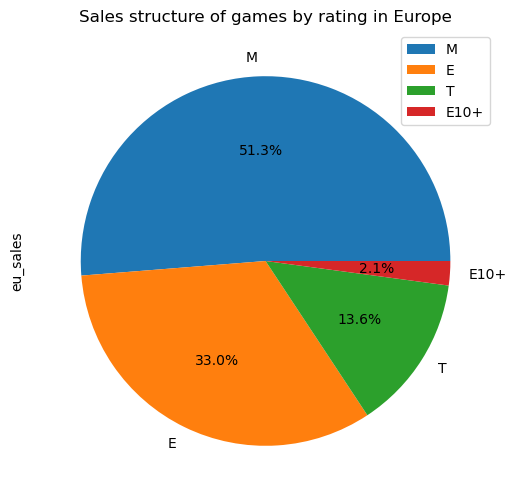

In [58]:
rating_max_eu.plot(y='eu_sales', kind = 'pie', autopct='%1.1f%%',
                     title = 'Sales structure of games by rating in Europe',figsize=(6,6));

The largest share (51.3%) in the sales volume in Europe is also provided by games with an 'M' rating

**Gaming Platforms of Japan**

In [59]:
# rating ESRB with total sales 
rating_max_jp = analysis.pivot_table(index='rating', values='jp_sales', aggfunc='sum')

# rating ESRB, ordered by decreasing total revenue
rating_max_jp.sort_values(by='jp_sales', ascending=False, inplace=True) 

# adding a column with sales share by region
rating_max_jp['jp_weight'] = round(rating_max_jp['jp_sales']*100/rating_max_jp['jp_sales'].sum(), 2)

rating_max_jp

,jp_sales,jp_weight
rating,,
M,1.58,31.79
E,1.47,29.58
E10+,1.46,29.38
T,0.46,9.26


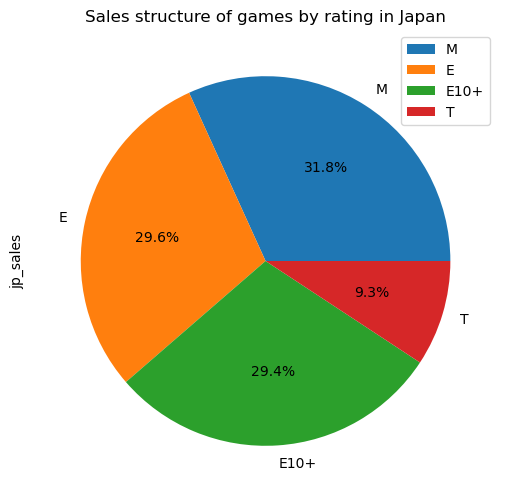

In [60]:
rating_max_jp.plot(y='jp_sales', kind = 'pie', autopct='%1.1f%%',
                     title = 'Sales structure of games by rating in Japan',figsize=(6,6));

The game market in Japan is almost equally divided among games with an "M" rating - 31.79%, games with an "E" rating ("Everyone") - 29.6%, and games with an "E10+" rating ("Everyone 10 and older") - 29.4%.

##### 4.4. Influence on sales volume of games without ratings

The analysis was conducted using the example of the most promising platforms for the current period. 
In this case, games with high ratings (above 80 from critics, above 8 from users) were selected.
In the resulting set of games, the ones without an ESRB rating are not significant.

In [61]:
print('Number of games without an ESRB rating', analysis['rating'].isna().count())

Number of games without an ESRB rating 20


In [62]:
# To assess the impact on sales volume of games without an ESRB rating, i will check their quantity for the current period.

rating_esrb = data.drop(data[data['year_of_release'] < 2014].index) 
print('Number of games without an ESRB rating: ', rating_esrb['rating'].isna().count())

rating_esrb_nan = rating_esrb.loc[rating_esrb['rating'].isna()] # creating a DataFrame of games without ESRB ratings"

# sales volume of games without ESRB and listed on gaming platforms in North America
rating_esrb_nan_na = rating_esrb_nan['na_sales'].sum()

# sales volume of games without ESRB and listed on gaming platforms in Europe
rating_esrb_nan_eu = rating_esrb_nan['eu_sales'].sum()

# sales volume of games without ESRB and listed on gaming platforms in Japan
rating_esrb_nan_jp = rating_esrb_nan['jp_sales'].sum()

print('Sales volume of games without ESRB and listed on gaming platforms in North America: ',
      rating_esrb_nan_na, 'M USD')
print('Sales volume of games without ESRB and listed on gaming platforms in Europe: ',
      rating_esrb_nan_eu, 'M USD')
print('Sales volume of games without ESRB and listed on gaming platforms in Japan: ',
      rating_esrb_nan_jp, 'M USD')

Number of games without an ESRB rating:  1689
Sales volume of games without ESRB and listed on gaming platforms in North America:  64.72 M USD
Sales volume of games without ESRB and listed on gaming platforms in Europe:  58.95 M USD
Sales volume of games without ESRB and listed on gaming platforms in Japan:  56.9 M USD


The volume of sales of games without an ERSB rating is significant. In order to determine the impact of such games on sales volume in different regions, I will create dataframes and plot corresponding graphs.

**Gaming Platforms of North America**

In [63]:
# The ESRB rating with total sales
rating_all_na = rating_esrb.pivot_table(index='rating', values='na_sales', aggfunc='sum')

# Let's create new dataframes for each region 
# with general information about games in terms of ESRB rating or its absence for North America
df_nan_na = {'na_sales': rating_esrb_nan_na}
rating_max_na = rating_max_na.reset_index()
rating_max_na = rating_max_na.append(df_nan_na,ignore_index = True)

# adding a column with the share of sales by region
rating_max_na['na_weight'] = round(rating_max_na['na_sales']*100/rating_max_na['na_sales'].sum(), 2)

rating_max_na

C:\Users\Юлия\AppData\Local\Temp\ipykernel_19580\1861731628.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rating_max_na = rating_max_na.append(df_nan_na,ignore_index = True)


,rating,na_sales,na_weight
0,M,24.10,22.89
1,T,9.19,8.73
2,E,5.73,5.44
3,E10+,1.54,1.46
4,NaN,64.72,61.47


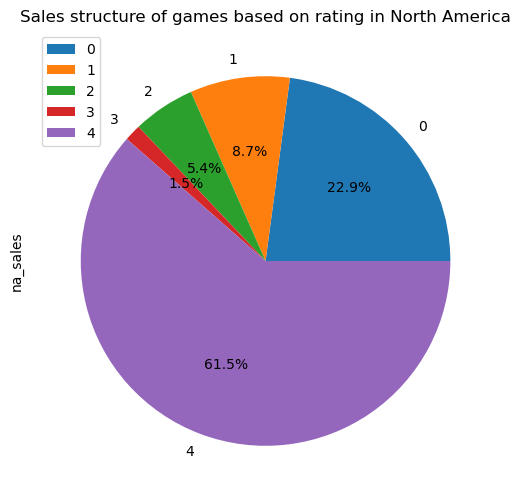

In [64]:
rating_max_na.plot(y='na_sales', kind = 'pie', autopct='%1.1f%%',
                     title = 'Sales structure of games based on rating in North America',figsize=(6,6));

**Gaming Platforms of Europe**

In [65]:
# The ESRB rating with total sales
rating_all_eu = rating_esrb.pivot_table(index='rating', values='eu_sales', aggfunc='sum')

# Let's create new dataframes for each region 
# with general information about games in terms of ESRB rating or its absence for Europe
df_nan_eu = {'eu_sales': rating_esrb_nan_eu}
rating_max_eu = rating_max_eu.reset_index()
rating_max_eu = rating_max_eu.append(df_nan_eu, ignore_index = True)

# sales structure of games based on rating in North America
rating_max_eu['eu_weight'] = round(rating_max_eu['eu_sales']*100/rating_max_eu['eu_sales'].sum(), 2)

rating_max_eu

C:\Users\Юлия\AppData\Local\Temp\ipykernel_19580\2922239740.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rating_max_eu = rating_max_eu.append(df_nan_eu, ignore_index = True)


,rating,eu_sales,eu_weight
0,M,28.48,24.87
1,E,18.35,16.02
2,T,7.55,6.59
3,E10+,1.18,1.03
4,NaN,58.95,51.48


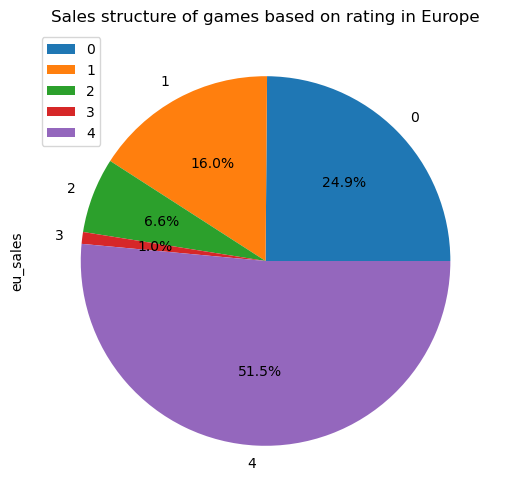

In [66]:
rating_max_eu.plot(y='eu_sales', kind = 'pie', autopct='%1.1f%%',
                     title = 'Sales structure of games based on rating in Europe',figsize=(6,6));

**Gaming Platforms of Japan**

In [67]:
# The ESRB rating with total sales
rating_all_jp = rating_esrb.pivot_table(index='rating', values='jp_sales', aggfunc='sum')

# Let's create new dataframes for each regiion
# with general information about games in terms of ESRB rating or its absence for Japan
df_nan_jp = {'jp_sales': rating_esrb_nan_jp}
rating_max_jp = rating_max_jp.reset_index()
rating_max_jp = rating_max_jp.append(df_nan_jp,ignore_index = True)

#добавление столбца с долей продаж по региону
rating_max_jp['jp_weight'] = round(rating_max_jp['jp_sales']*100/rating_max_jp['jp_sales'].sum(), 2)

rating_max_jp

C:\Users\Юлия\AppData\Local\Temp\ipykernel_19580\1700970341.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rating_max_jp = rating_max_jp.append(df_nan_jp,ignore_index = True)


,rating,jp_sales,jp_weight
0,M,1.58,2.55
1,E,1.47,2.38
2,E10+,1.46,2.36
3,T,0.46,0.74
4,NaN,56.90,91.97


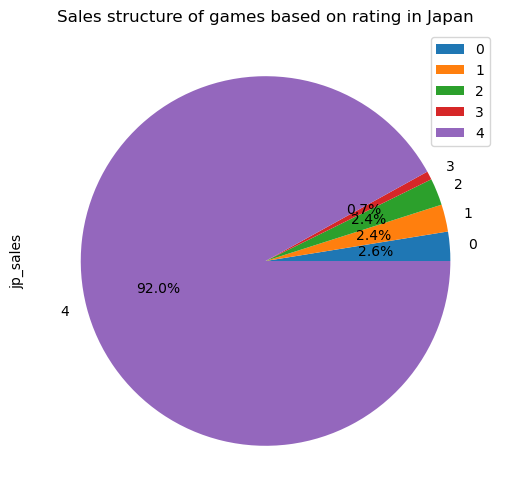

In [68]:
rating_max_jp.plot(y='jp_sales', kind = 'pie', autopct='%1.1f%%',
                     title = 'Sales structure of games based on rating in Japan',figsize=(6,6));

**Conclusion:**
The sales volume of games without ESRB ratings in the region is significant for the current period. In Japan, such games account for 92% of all revenues. This may be explained by the fact that CERO, a non-profit organization founded in July 2002, is responsible for age ratings for console games in Japan.

### 5. Testing Hypotheses

#### 5.1.  "The average user ratings for Xbox One and PC platforms are the same"

The average user ratings of the Xbox One and PC platforms are the same - this is a statistical hypothesis regarding the means of two populations, where the means of the two populations are equal to each other.

Let's formulate the null hypothesis H₀:
"The mean of the first population (user ratings of the Xbox One platform) is equal to the mean of the second population (user ratings of the PC platform)."

Based on H₀, i formulate the alternative hypothesis H₁:
"The mean of the first population (user ratings of the Xbox One platform) is not equal to the mean of the second population (user ratings of the PC platform)."
This alternative hypothesis is called two-sided because there is a possible deviation in both the greater and lesser directions.


In this case, a t-test can be used because:

1. The populations are independent of each other.
2. The sample means are normally distributed.

In [69]:
# The first overall population
global_sales_x_one = data.loc[data['platform']=='XOne']
global_sales_x_one = global_sales_x_one.drop(global_sales_x_one[(global_sales_x_one['user_score'] == 0)].index)
global_sales_x_one = global_sales_x_one.pivot_table(index='name', values='user_score')

In [70]:
print('Variance for the entire population (user ratings of the platform Xbox One): ', np.var(global_sales_x_one))
print('Size of the population:', global_sales_x_one.count())

Variance for the entire population (user ratings of the platform Xbox One):  user_score    1.896519
dtype: float64
Size of the population: user_score    182
dtype: int64


In [71]:
# The second overall population
global_sales_pc = data.loc[data['platform']=='PC']
global_sales_pc = global_sales_pc.drop(global_sales_pc[(global_sales_pc['user_score'] == 0)].index)
global_sales_pc = global_sales_pc.pivot_table(index='name', values='user_score') 

print('Variance for the entire population (user ratings of the platform PC): ', np.var(global_sales_pc))
print('Size of the population:', global_sales_pc.count())

Variance for the entire population (user ratings of the platform PC):  user_score    2.320473
dtype: float64
Size of the population: user_score    751
dtype: int64


**Conclusion:**
The variances of the populations are different, and moreover, the population sizes differ significantly, so an additional parameter equal_var=False should be used.

alpha = 0.05 #level of statistical significance

In [72]:
from scipy import stats as st
alpha = 0.05 #level of statistical significance
# if the p-value is lower than it, I will reject the hypothesis

results_1 = st.ttest_ind(global_sales_x_one, global_sales_pc, equal_var=False)

print('P-value:', results_1.pvalue)

if results_1.pvalue < alpha:
    print('Reject the null hypothesis')
else:
    print('Failed to reject the null hypothesis')    


P-value: [3.72252588e-06]
Reject the null hypothesis


The p-value indicates that there is a high probability of obtaining the same means for the analyzed datasets by chance. Therefore, the hypothesis should be rejected.

#### 5.2.  "In the Action and Sports genres, the average user ratings are different"

The average user ratings for the Action and Sports genres are the same - the statistical hypothesis concerns the means of two populations, where the means of the two populations are not equal to each other.

Let's formulate the null hypothesis H₀:
"The mean of the first population (user ratings for Action genres) and the mean of the second population (user ratings for Sports genres) are different."

Based on H₀, we formulate the alternative hypothesis H₁:
"The mean of the first population (user ratings for Action genres) and the mean of the second population (user ratings for Sports genres) are the same."

This alternative hypothesis is called two-tailed because there is a possible deviation in both the greater and lesser directions.

In the present case, a t-test can be used because:

1. The populations are independent of each other.
2. The sample means are normally distributed.

In [73]:
# The first overall population
global_sales_action = data.loc[data['genre']=='Action']

global_sales_action = global_sales_action.drop(global_sales_action[(global_sales_action['user_score'] == 0)].index)

global_sales_action = global_sales_action.pivot_table(index='name', values='user_score') 

print('Variance for the entire population (user ratings for the Action genre): ', np.var(global_sales_action))
print('Size of the population:', global_sales_action.count())

Variance for the entire population (user ratings for the Action genre):  user_score    1.897736
dtype: float64
Size of the population: user_score    917
dtype: int64


In [74]:
# The second overall population
global_sales_sports = data.loc[data['genre']=='Sports']

global_sales_sports = global_sales_sports.drop(global_sales_sports[(global_sales_sports['user_score'] == 0)].index)

global_sales_sports = global_sales_sports.pivot_table(index='name', values='user_score') 

print('Variance for the entire population (user ratings for the Sports genre ): ', np.var(global_sales_sports))
print('Size of the population:', global_sales_sports.count())

Variance for the entire population (user ratings for the Sports genre ):  user_score    2.318808
dtype: float64
Size of the population: user_score    542
dtype: int64


The variances of the populations are different, and their sample sizes are significantly different as well, so it is necessary to use an additional parameter, equal_var=False.

In [75]:
from scipy import stats as st
alpha = 0.05 #level of statistical significance
# if the p-value is lower than it, I will reject the hypothesis

results_2 = st.ttest_ind(global_sales_action, global_sales_sports, equal_var=False)

print('P-value:', results_2.pvalue)

if results_2.pvalue < alpha:
    print('Reject the null hypothesis')
else:
    print('Failed to reject the null hypothesis')    
    


P-value: [0.17937483]
Failed to reject the null hypothesis


The p-value indicates the probability that the average user ratings of the Action and Sports genres are different, and it's almost 18%. This is clearly too high a probability, so we can conclude that there is a significant difference between the average user ratings of the Action and Sports genres.

# 6. Conclusion

The study was conducted based on data from an online store, which sells computer games worldwide. Historical data on game sales, user and expert ratings, genres, and platforms (e.g., Xbox or PlayStation) are available from open sources. The goal of the study is to identify patterns that determine the success of a game. This will allow the research client to focus on potentially popular products and plan advertising campaigns for 2017.

In general, the data provided for analysis reflect the dynamics of changes that have occurred in the video game market. By 1994, the market had developed so rapidly that it led to the formation of ratings that helped potential users navigate a large volume of diverse offerings. In 1994, the Entertainment Software Rating Board (ESRB) was created, which determines the rating of computer games and assigns them an appropriate age category. The most popular age ratings for the period are 'E', 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP'.

For the analysis, the relevant period of 2014-2016 was chosen, based on the following features of the video game market's development:

1)If before 2011, the number of games released was constantly increasing, then in the period from 2012 to 2016, the number of games significantly decreased compared to the previous five years (2006-2011). Therefore, it can be concluded that the maximum analyzed period can be 5 years. 

2)The income period for a "successful" platform is a minimum of 4 years. Let's assume that 2017 will presumably be the last year to generate income. In this case, the relevant period will be 3 years. 

3)If we take only one year for analysis (for example, 2016), there is a possibility that the data will not reflect all the trends that have developed in the market (data may be missing for various reasons, force majeure circumstances may occur), or, conversely, reflect factors that are characteristic only for one year, and subsequently lose their relevance.

The analysis selected the most potentially profitable gaming platforms. The following criteria were taken into account when choosing them:

1)The game release date should not be later than 2014 (based on the chosen relevant period).

2)The availability of data on positive ratings and user reviews for the game (if the rating is high and the reviews are positive, then the sales revenues are more likely to grow).

3)The availability of sales data for all regions and the highest sales figures for the game.

As a result of the analysis, the following promising gaming platforms were selected: 'PS4', 'WiiU', 'XOne'

The PS4 platform is distinguished by having the highest number of games (237), which indicates financial stability. The presence of a significant number of high-revenue games allowed this platform to take the leading positions. The game "Grand Theft Auto V," placed on this platform, generated the highest revenue for the entire analyzed period - $12.62 million. The PS4 gaming platform is the leader in sales in North America and Europe, accounting for 60.5% and 82.6% of the total sales volume, respectively.

The WiiU platform lags in terms of sales volume behind the rating leader - the PS4 platform. The total number of games on this platform is 43, three of which (the most successful of which is "Mario Kart 8" with $7.09 million) provided high revenues from sales for the entire platform during the analyzed period. The WiiU gaming platform is the sales leader in Japan, with a share of 55.1% of the total sales volume, while the PS4 is in second place with a share of 43.9%.

The XOne platform is another successful platform. Analytical data on this platform reflects the components of a successful perspective platform: a large number of games (in this case - 155) in general and the presence of nine high-revenue games. The game "Grand Theft Auto V" also generated the highest revenue for this platform - $5.47 million.

The average user ratings for the Xbox One and PC platforms are the same - the statistical hypothesis regarding the average values of two populations, where the averages of the two populations are equal to each other, was not confirmed.

The average user ratings for the Action and Sports genres are the same - the statistical hypothesis regarding the average values of two populations, where the averages of the two populations are not equal to each other, was confirmed.

An analysis of promising platforms has led to the following conclusions:

The highest sales volume is achieved by games with an "M" rating ("Mature") — "17+": Game content is suitable for ages 17 and older. In the total sales volume, games with an "M" rating account for 59.4% in North America, 51.3% in Europe, and 31.79% in Japan. It's worth noting that the game market in Japan is almost equally divided between games with an "M" rating - 31.79%, games with an "E" rating ("Everyone") - 29.6%, and games with an "E10+" rating ("Everyone 10 and older") - 29.4%.

User and critic reviews significantly influence sales volume.

The most popular game genres are Action, Shooter, and Sports, while Role-Playing and Racing are the outsiders. In North America and Europe, the sales leaders are Shooter and Action games, while in Japan, Shooter games dominate with a sales share of 49.3%.